## Priprava podatkov, osnovne statistike in vizualizacija

Podatkovno rudarjenje, naloga, `<VPIŠI DATUM ODDAJE>`  
**`<VPIŠI Ime in priimek>`**

Neizogiben del vsakega projekta na področju podatkovnega rudarjenja je iskanje,
urejanje in priprava podatkov. V tej nalogi boste spoznali primer podatkovne
zbirke in uporabili postopke za pretvorbo podatkov v ustrezno obliko ter pregled in
prikaz osnovnih statistik.

### Podatki

V nalogi boste pregledali in pripravili podatke gledanosti Hollywoodskih filmov
zbirke [MovieLens](https://grouplens.org/datasets/movielens/) v obdobju **1995-2016**.

Iste podatke boste uporabili v vseh nalogah, zato jih dodobra spoznajte. Gre za podatkovno zbirko za
vrednotenje priporočilnih sistemov, ki vsebuje gledalce ter njihove ocene za posamezni film na lestvici 1 do 5. 
Poleg osnovne matrike uporabnikov in ocen vsebuje še dodatne podatke o filmih (npr. žanr, datum, oznake,
igralci).

Podatki so v mapi `./podatki/ml-latest-small`. Podatkovna zbirka vsebuje naslednje datoteke:

* ratings.csv: podatki o uporabnikih in ocenah,
* movies.csv: podatki o žanrih filmov,
* cast.csv: podatki o igralcih,
* tags.csv: podatki o oznakah (ang. \emph{tags}),
* links.csv: povezave na sorodne podatkovne zbirke.


Pred pričetkom reševanja naloge si dobro oglejte podatke in datoteko **README.txt**. Podrobnosti o zbirki lahko preberete na [spletni strani](http://files.grouplens.org/datasets/movielens/ml-latest-small-README.html).

Pripravite metode za nalaganje podatkov v ustrezne podatkovne strukture. Te vam bodo prišle
prav tudi pri nadaljnjih nalogah.
Bodite pozorni na velikost podatkov.

Zapišite kodo za branje datotek in pripravo ustreznih matrik (in drugih struktur) podatkov, ki jih boste uporabi pri odgovarjanju na spodnja vprašanja.

Kodo lahko razdelite v več celic.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Branje podatkovnih datotek
ratings = pd.read_csv("./podatki./ml-latest-small/ratings.csv")
movies = pd.read_csv("./podatki./ml-latest-small/movies.csv")
cast = pd.read_csv("./podatki./ml-latest-small/cast.csv")
tags = pd.read_csv("./podatki./ml-latest-small/tags.csv")
links = pd.read_csv("./podatki./ml-latest-small/links.csv")

### Vprašanja

Glavni namen podatkovnega rudarjenja je *odkrivanje znanj iz podatkov*,
torej odgovarjanje na vprašanja z uporabo računskih postopkov.

Z uporabo principov, ki ste jih spoznali na vajah in predavanjih, odgovorite na
spodnja vprašanja. Pri vsakem vprašanju dobro premislite, na kakšen način boste
najbolje podali, prikazali oz. utemeljili odgovor. Bistven del so odgovori na
vprašanja in ne implementacija vaše rešitve.

#### 1. vprašanje (15%):
Kateri filmi so v povprečju najbolje ocenjeni?  Pripravite seznam
filmov ter njihovih povprečnih ocen in izpišite 10 filmov z vrha seznama.
Opazite pri takem ocenjevanju kakšno težavo? Kako bi jo lahko rešili? Kakšni so
rezultati tedaj?

Kodo lahko razdelite v več celic.

In [2]:
# Izračunamo povprečno oceno vsakega filma
average_ratings = ratings.groupby("movieId")["rating"].mean().reset_index()

# Združimo s podatki o filmih, da dodamo naslove filmov
average_ratings = average_ratings.merge(movies, on="movieId")

# Razvrstimo po povprečni oceni (od najvišje do najnižje)
top_10_movies = average_ratings.sort_values(by="rating", ascending=False).head(10)

# Izpišemo top 10 najbolje ocenjenih filmov
print(top_10_movies[["title", "rating"]])

                                                  title  rating
6918                                   Delirious (2006)     5.0
6932                                     Shelter (2007)     5.0
8055                                One Man Band (2005)     5.0
9065  The Beatles: Eight Days a Week - The Touring Y...     5.0
6929                                     Fiorile (1993)     5.0
6925                  Stargate: The Ark of Truth (2008)     5.0
7692                                        Cops (1922)     5.0
7689                             Play House, The (1921)     5.0
9023                 The Last Days of Emma Blank (2009)     5.0
3638                                Package, The (1989)     5.0


**Možna težava**: 
Filmi z zelo malo ocenami se lahko pojavijo na vrhu. Če je nek film ocenil en sam uporabnik s 5.0, bo takoj na vrhu, kar ni pravično. 
<br>
**IMDB Weighted Rating Formula**:


$$
WR = \frac{v}{v+m} R + \frac{m}{v+m} C
$$


Kjer:  
- \( R \) = povprečna ocena filma  
- \( v \) = število ocen za film  
- \( m \) = prag minimalnega števila ocen (npr. **50**)  
- \( C \) = povprečna ocena vseh filmov  


In [3]:
# Izračunamo povprečno oceno vseh filmov
C = ratings["rating"].mean()

# Določimo minimalno število ocen za upoštevanje (prag)
m = 50

# Izračunamo število ocen za vsak film
vote_counts = ratings.groupby("movieId")["rating"].count().reset_index()
vote_counts.columns = ["movieId", "vote_count"]

# Združimo s povprečnimi ocenami
qualified_movies = average_ratings.merge(vote_counts, on="movieId")

# Uporabimo IMDB tehtano oceno
qualified_movies["weighted_rating"] = (
    (qualified_movies["vote_count"] / (qualified_movies["vote_count"] + m) * qualified_movies["rating"]) +
    (m / (qualified_movies["vote_count"] + m) * C)
)

# Razvrstimo po tehtani oceni
top_10_weighted = qualified_movies.sort_values(by="weighted_rating", ascending=False).head(10)

# Izpišemo izboljšane rezultate
print(top_10_weighted[["title", "weighted_rating", "vote_count"]].to_string(index=False))

                                                title  weighted_rating  vote_count
                     Shawshank Redemption, The (1994)         4.356455         311
                                Godfather, The (1972)         4.298722         200
                           Usual Suspects, The (1995)         4.205898         201
                              Schindler's List (1993)         4.174083         244
                                  Pulp Fiction (1994)         4.160910         324
                       Godfather: Part II, The (1974)         4.157732         135
                                         Fargo (1996)         4.126571         224
            Star Wars: Episode IV - A New Hope (1977)         4.122230         291
Star Wars: Episode V - The Empire Strikes Back (1980)         4.111551         234
                               American Beauty (1999)         4.108076         220


Pravično upošteva tako povprečno oceno kot število ocen.

#### 2. vprašanje (15%):
Posamezni film pripada enemu ali več žanrom. 
Koliko je vseh žanrov? Prikaži porazdelitev žanrov z uporabo ustrezne
vizualizacije.

Kodo lahko razdelite v več celic.

Število različnih žanrov: 19


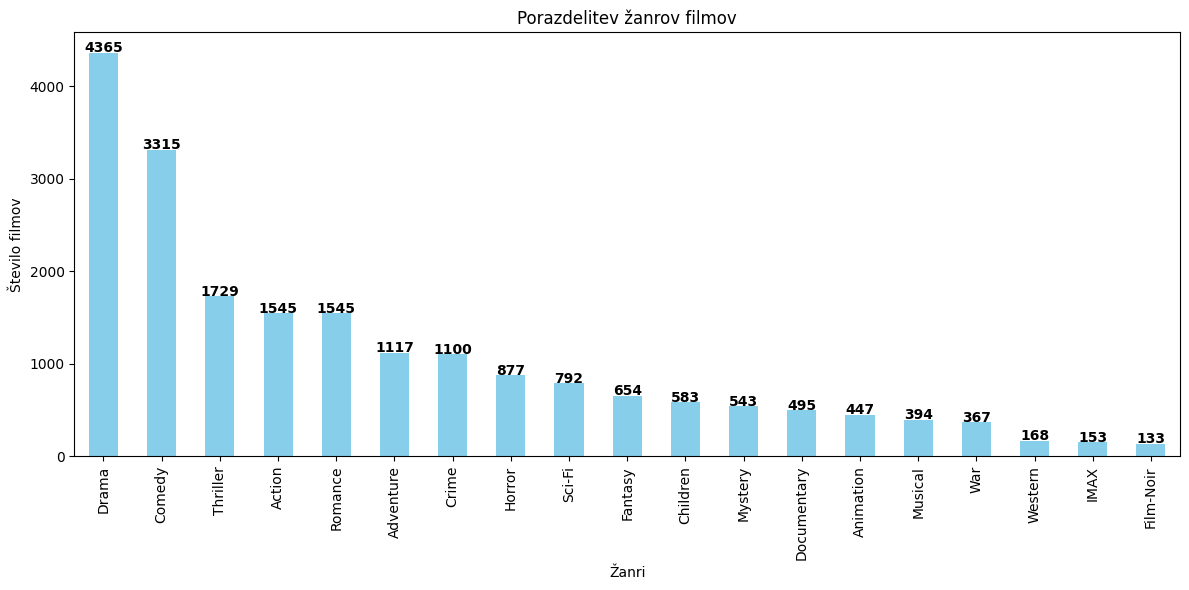

In [4]:
# Razdelimo žanre in izračunamo vse unikatne žanre
genres = movies['genres'].str.split('|', expand=True).stack()
genres = genres[genres != "(no genres listed)"]
# Izračunamo število unikatnih žanrov
unique_genres = genres.unique()
num_unique_genres = len(unique_genres)

# Prikaz števila žanrov
print(f"Število različnih žanrov: {num_unique_genres}")

# Izračunamo porazdelitev žanrov (število filmov v vsakem žanru)
genre_counts = genres.value_counts()

# Prikaz porazdelitve žanrov s stolpičnim diagramom
plt.figure(figsize=(12, 6))
bars = genre_counts.plot(kind='bar', color='skyblue')

#Oznake nad vsak stolpec
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width()/2,  # X položaj (sredina stolpca)
             bar.get_height() + 5,  # Y položaj (malo nad stolpcem)
             str(int(bar.get_height())),  # Pretvori vrednost v int in string
             ha='center', fontsize=10, fontweight='bold')

plt.title("Porazdelitev žanrov filmov")
plt.xlabel("Žanri")
plt.ylabel("Število filmov")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Paziti je bilo treba na vrednost (no genres listed). 

#### 3. vprašanje (20%):
Število ocen (ogledov) se za posamezni film razlikuje. Ali
obstaja povezava med gledanostjo in povprečno oceno filma? Opišite postopek, ki
ste ga uporabili pri odgovarjanju na vprašanje.

Kodo lahko razdelite v več celic.

Korelacija med št. ocen in povprečno oceno: 0.131


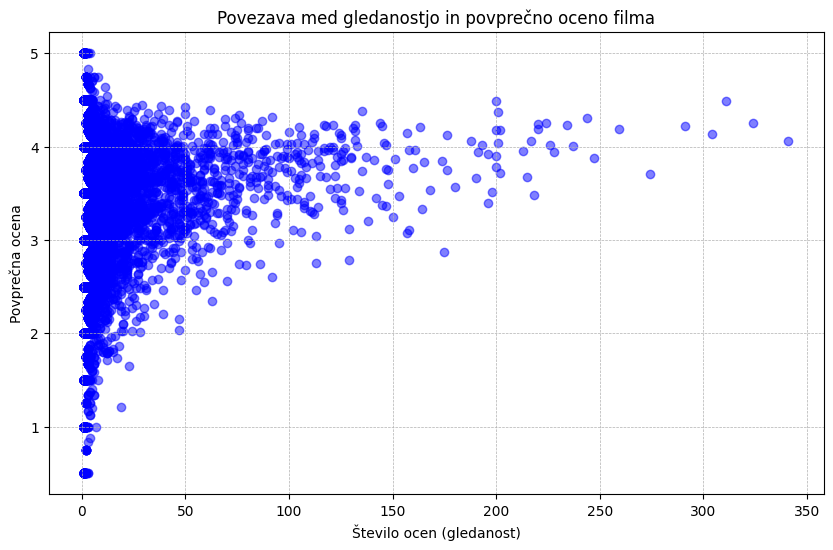

In [5]:
# Združimo podatke v en DataFrame
movie_stats = average_ratings.merge(vote_counts, on="movieId")

# Izračun korelacije med št. ocen in povprečno oceno
correlation = movie_stats["vote_count"].corr(movie_stats["rating"])
print(f"Korelacija med št. ocen in povprečno oceno: {correlation:.3f}")

# Narišemo raztreseni diagram
plt.figure(figsize=(10, 6))
plt.scatter(movie_stats["vote_count"], movie_stats["rating"], alpha=0.5, color="blue")

# Oznake in naslov grafa
plt.xlabel("Število ocen (gledanost)")
plt.ylabel("Povprečna ocena")
plt.title("Povezava med gledanostjo in povprečno oceno filma")

# Logaritmična skala za boljši pregled (opcijsko)
plt.xscale("linear")

# Dodamo mrežo za lažje branje
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Prikaz grafa
plt.show()

**Ugotovitve:**
<br>
- Večina filmov ima malo ocen
- Pri filmih z manj kot 50 ocenami se ocene raztezajo od 1 do 5.
- Ko se število ocen povečuje (desni del grafa), se povprečne ocene bolj stabilizirajo okoli 3.5 – 4.5.
- Sama korelacija je nizka, iz grafa pa dobimo vzorec.

#### 4. vprašanje (30%):
Vsaka ocena je bila vnešena na določen datum (stolpec
*timestamp*).  Ali se popularnost posameznih filmov s časom spreminja?
Problem reši tako, da za dani film ocene razporediš po času ter v vsaku časovni
točki izračunaš povprečje za zadnjih 30, 50, ali 100 ocen. Nariši graf, kako se
ocena spreminja in ga prikaži za dva zanimiva primera filmov.

Kodo lahko razdelite v več celic.

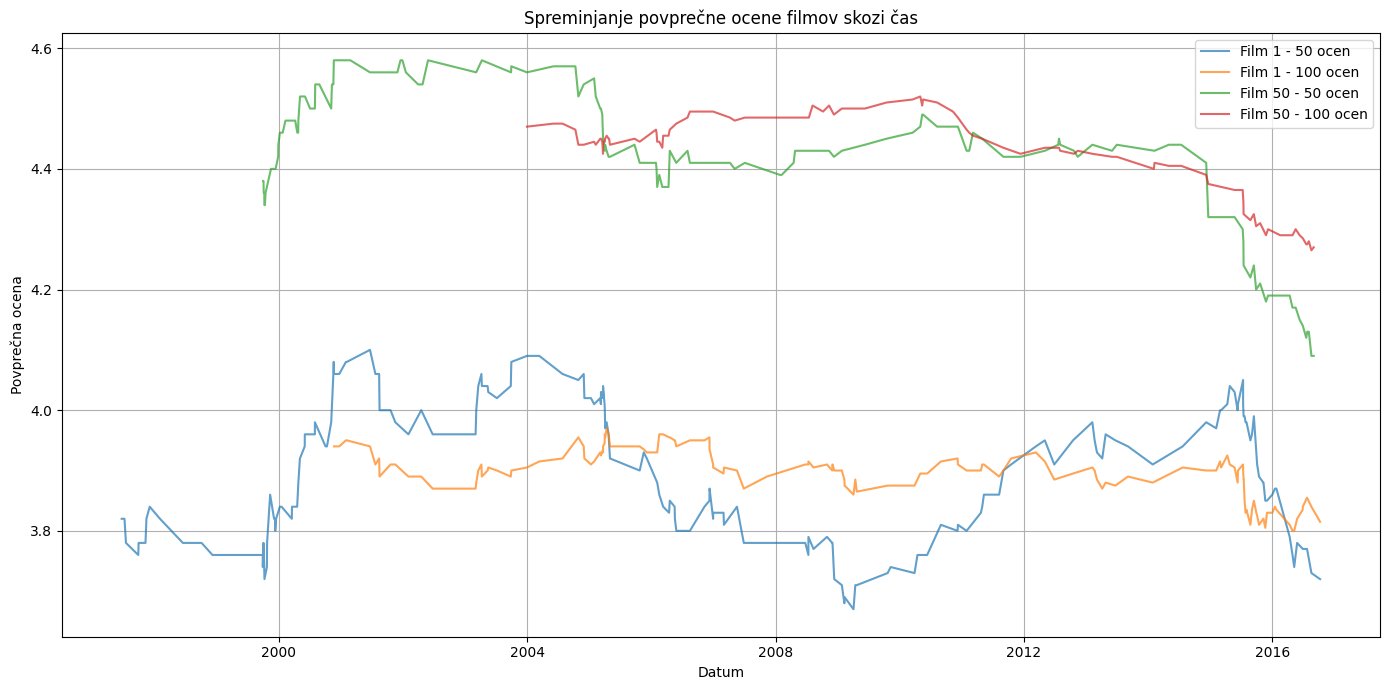

In [23]:
# Funkcija za preverjanje in pretvorbo timestamp v datetime, če ni že v tej obliki
def convert_timestamp_to_datetime(timestamp):
    if isinstance(timestamp, int):  # Če je timestamp še v obliki int (Unix timestamp)
        return datetime.fromtimestamp(t).strftime('%Y-%m-%d %H:%M')
    return timestamp  # Če je že v obliki datetime, ga pustimo nespremenjenega

# Funkcija za izračun povprečja zadnjih n ocen
def calculate_moving_average(ratings, n):
    ratings = ratings.sort_values(by='timestamp')  # Sortiraj po času
    ratings['moving_average'] = ratings['rating'].rolling(window=n).mean()  # Izračun povprečja
    return ratings

# Preverimo ali je 'timestamp' že v obliki datetime
if not pd.api.types.is_datetime64_any_dtype(ratings['timestamp']):
    ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')  # Pretvorba Unix timestampov v datetime

# Izberemo dva zanimiva filma (na primer film z ID 1 in ID 50)
movie_ids = [1, 50]  # Lahko izbiraš tudi druge filme

# Prikaz za dva filma
plt.figure(figsize=(14, 7))

for movie_id in movie_ids:
    movie_ratings = ratings[ratings['movieId'] == movie_id]
    
    # Izračunamo povprečje zadnjih 50 ocen
    movie_ratings_50 = calculate_moving_average(movie_ratings, 50)
    
    # Izračunamo povprečje zadnjih 100 ocen
    movie_ratings_100 = calculate_moving_average(movie_ratings, 100)
    
    # Prikaz za film
    plt.plot(movie_ratings_50['timestamp'], movie_ratings_50['moving_average'], label=f'Film {movie_id} - 50 ocen', alpha=0.7)
    plt.plot(movie_ratings_100['timestamp'], movie_ratings_100['moving_average'], label=f'Film {movie_id} - 100 ocen', alpha=0.7)

# Nastavimo oznake in naslov
plt.title('Spreminjanje povprečne ocene filmov skozi čas')
plt.xlabel('Datum')
plt.ylabel('Povprečna ocena')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Prikaz grafa
plt.show()


Odgovor: **zapišite utemeljitev odgovora**

#### 5. vprašanje (20%):
Kako bi ocenili popularnost posameznih igralcev? Opišite postopek
ocenitve ter izpišite 10 najbolj popularnih igralcev.

Kodo lahko razdelite v več celic.

In [39]:
# Razdelimo stolpec 'cast' na posamezne igralce
movie_ratings = ratings.merge(cast, on="movieId")

# Razdelimo igralce, ki so ločeni z '|'
movie_ratings_expanded = movie_ratings.assign(cast=movie_ratings['cast'].str.split('|')).explode('cast')

# Preštejemo število filmov in ocen za vsakega igralca
actor_ratings = movie_ratings_expanded.groupby('cast').agg(
    num_movies=('movieId', 'nunique'),  # Število filmov, v katerih je igralec nastopil
    num_ratings=('rating', 'count')     # Število ocen, ki so jih prejeli filmi
).reset_index()

# Razvrstimo igralce po številu ocenjenih filmov (num_ratings)
top_10_actors = actor_ratings.sort_values(by="num_ratings", ascending=False).head(11)

# Odstranimo vrstico, kjer je cast številka (ne igralec) in ponastavimo indeks
top_10_actors_cleaned = top_10_actors[~top_10_actors['cast'].str.isnumeric()].reset_index(drop=True)

# Izpišemo top 10 igralcev brez indeksa
print(top_10_actors_cleaned[['cast', 'num_movies', 'num_ratings']])

              cast  num_movies  num_ratings
0                         9024        99846
1    Harrison Ford          35         2297
2        Tom Hanks          45         2262
3     Bruce Willis          56         1832
4   Robert De Niro          66         1628
5   Morgan Freeman          54         1603
6        Brad Pitt          36         1488
7       Tom Cruise          33         1470
8      Bill Murray          47         1380
9       Jim Carrey          29         1354
10    Kevin Spacey          33         1329


Odgovor: **zapišite utemeljitev odgovora**

#### Bonus vprašanje (5%):

Kateri je tvoj najljubši film? Zakaj?

Odgovor: **zapišite utemeljitev odgovora**

"The Gorge" je film, ki sem ga nazadnje v celoti pogledal (kar je zame prava redkost).

### Zapiski
Za nalaganje podatkov lahko uporabite modul `csv`.

In [ ]:
from csv import DictReader

reader = DictReader(open('podatki/ml-latest-small/ratings.csv', 'rt', encoding='utf-8'))
for row in reader:
    user = row["userId"]
    movie = row["movieId"]
    rating = row["rating"]
    timestamp = row["timestamp"]

Podatki v zadnji vrstici datoteke:

In [ ]:
user, movie, rating, timestamp

Pretvorba časovnega formata (*Unix time*). Kode za oblikovanje so navedene v dokumentaciji modula [`datetime`](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

In [ ]:
from datetime import datetime

t = 1217897793 # Unix-time
ts = datetime.fromtimestamp(t).strftime('%Y-%m-%d %H:%M')
ts